In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
dataset=pd.read_csv('F:/PythonML/Python Datasets/Regression Datasets/tesla.csv')


In [3]:
dataset.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [4]:
dataset['Date'] = pd.to_datetime(dataset.Date)

In [5]:
dataset.shape

(1692, 7)

In [6]:
dataset.drop('Adj Close',axis = 1, inplace = True)

In [7]:
dataset.head()

,Date,Open,High,Low,Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900


In [8]:
dataset.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [42]:
dataset.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 6 columns):
Date      1692 non-null datetime64[ns]
Open      1692 non-null float64
High      1692 non-null float64
Low       1692 non-null float64
Close     1692 non-null float64
Volume    1692 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 79.4 KB


In [10]:
dataset.describe()

,Open,High,Low,Close,Volume
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05
25%,30.000000,30.650000,29.214999,29.884999,1.194350e+06
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07


In [11]:
print(len(dataset))

1692


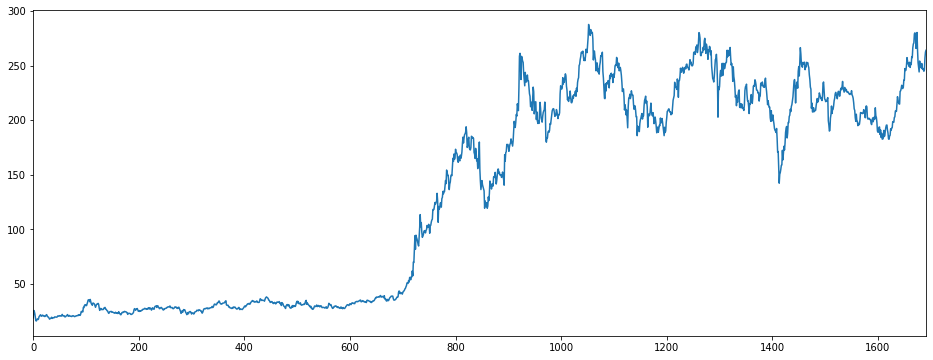

In [43]:
dataset['Open'].plot(figsize=(16,6))

In [12]:

X  = dataset[['Open','High','Low','Volume']]
y = dataset['Close']

In [13]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X ,y , random_state = 0)

In [14]:
X_train.shape

(1269, 4)

In [15]:
X_test.shape

(423, 4)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [17]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
print(regressor.coef_)

[-5.61128249e-01  8.20244083e-01  7.40523854e-01 -2.44481307e-08]


In [19]:
print(regressor.intercept_)

0.03439958011347244


In [20]:
predicted=regressor.predict(X_test)

In [21]:
print(X_test)

            Open        High         Low   Volume
124    31.260000   32.480000   29.920000  1552600
1688  246.110001  258.119995  246.020004  7575500
1397  198.970001  205.070007  197.250000  5322200
6      16.139999   17.520000   15.570000  7711400
1279  264.269989  267.890015  262.000000  2790100
...          ...         ...         ...      ...
1222  221.000000  237.479996  220.250000  9455900
215    27.200001   27.440001   26.170000  1218500
536    29.690001   31.299999   29.100000   870100
1630  198.080002  202.589996  197.600006  3796900
1548  224.169998  225.110001  222.679993  2065500

[423 rows x 4 columns]


In [22]:
predicted.shape

(423,)

In [23]:
dframe=pd.DataFrame(y_test,predicted)

In [37]:
dfr=pd.DataFrame({'Actual':y_test,'Predicted':predicted})

In [38]:
print(dfr)

          Actual   Predicted
124    30.090000   31.253574
1688  258.000000  255.654999
1397  204.990005  202.532384
6      17.459999   16.689894
1279  263.820007  265.429280
...          ...         ...
1222  236.800003  233.685818
215    26.440001   26.628928
536    31.170000   30.576112
1630  202.490005  201.294051
1548  222.929993  223.740777

[423 rows x 2 columns]


In [39]:
dfr.head(25)

,Actual,Predicted
124,30.090000,31.253574
1688,258.000000,255.654999
1397,204.990005,202.532384
6,17.459999,16.689894
1279,263.820007,265.429280
642,34.099998,34.061340
229,28.980000,28.000102
446,35.000000,34.933071
568,28.490000,28.229043
1110,246.720001,243.620755


In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score


In [27]:
regressor.score(X_test,y_test)

0.999703484441961

In [28]:
import math

In [29]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 1.0928260736454611


In [30]:
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,predicted))

Mean Squared  Error: 2.6595159843763505


In [31]:
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Root Mean Squared Error: 1.630802251769463


In [40]:
graph=dfr.head(20)

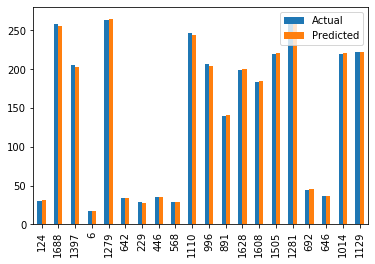

In [41]:
graph.plot(kind='bar')